# 2. Does gross product predict ratings?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
data_path = os.path.join('zippedData')
files = os.listdir(data_path)
file_paths = ['zippedData/' + file for file in files]
print(file_paths)

['zippedData/bom.movie_gross.csv.gz', 'zippedData/imdb.name.basics.csv.gz', 'zippedData/imdb.title.akas.csv.gz', 'zippedData/imdb.title.basics.csv.gz', 'zippedData/imdb.title.crew.csv.gz', 'zippedData/imdb.title.principals.csv.gz', 'zippedData/imdb.title.ratings.csv.gz', 'zippedData/rt.movie_info.tsv.gz', 'zippedData/rt.reviews.tsv.gz', 'zippedData/tmdb.movies.csv.gz', 'zippedData/tn.movie_budgets.csv.gz']


In [4]:
"""Adding files into a DataFrame dictionary so one is able to recognize the file.
The file is the key and the information in the DataFrame is the value"""
df_dict = {}
file_paths = ['zippedData/bom.movie_gross.csv.gz', 'zippedData/imdb.name.basics.csv.gz', 
              'zippedData/imdb.title.akas.csv.gz', 'zippedData/imdb.title.basics.csv.gz', 
              'zippedData/imdb.title.crew.csv.gz', 'zippedData/imdb.title.principals.csv.gz', 
              'zippedData/imdb.title.ratings.csv.gz','zippedData/tmdb.movies.csv.gz', 'zippedData/tn.movie_budgets.csv.gz']
for file in file_paths:
    df_dict[file] = pd.read_csv(file)
rotten_file_paths = ['zippedData/rt.movie_info.tsv.gz', 'zippedData/rt.reviews.tsv.gz']
for file in rotten_file_paths:
    df_dict[file] = pd.read_csv(file, delimiter='\t', encoding='ISO-8859-1')    
print(df_dict)

{'zippedData/bom.movie_gross.csv.gz':                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          

In [5]:
# movie_gross = df_dict['zippedData/bom.movie_gross.csv.gz']
# movie_gross.head()

In [6]:
# movie_gross.info()

In [7]:
# movie_gross = movie_gross.dropna(subset = ['domestic_gross', 'foreign_gross'])

In [8]:
# movie_gross['foreign_gross'] = movie_gross['foreign_gross'].apply(lambda x: float(x.replace(',','')))
# movie_gross.info()

In [9]:
# movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
# movie_gross.head()

In [10]:
# movie_gross['total_gross'] = movie_gross['total_gross'].sort_values(ascending = False)

In [11]:
# movie_gross.head(15)

In [12]:
# df_dict['zippedData/rt.movie_info.tsv.gz'].head()
# df_dict['zippedData/imdb.name.basics.csv.gz'].head()
# df_dict['zippedData/imdb.title.akas.csv.gz'].head()
# df_dict['zippedData/imdb.title.crew.csv.gz'].head()
# df_dict['zippedData/imdb.title.principals.csv.gz'].head()

In [13]:
"""Renaming the DataFrame genre"""
genre = df_dict['zippedData/imdb.title.basics.csv.gz']

"""Renaming the DataFrame rating"""
rating = df_dict['zippedData/imdb.title.ratings.csv.gz']

"""Merging the DataFrames genre and rating into a DataFrame called ratings"""
ratings = pd.merge(genre, rating, on = 'tconst')
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [14]:
"""Drop the NaN values within the genres and averagerating columns"""
ratings = ratings.dropna(subset = ['genres', 'averagerating'])
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
"""Changing the np array to a string"""
str(ratings['genres'].unique())

"""Cleaning the previous list"""
clean = str(ratings['genres'].unique()).replace("[","").replace("]","").replace("\n", "").replace("'", "").replace(" ", ",").split(",")
print(clean)

"""No duplicates in the set method"""
clean_set_genres = set(clean)
print(clean_set_genres)

"""Alphabetize the set so the bar graph will be easier to follow"""
clean_set_genres = sorted(clean_set_genres)

['Action', 'Crime', 'Drama', 'Biography', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'History', 'Documentary', 'Animation', 'Drama', 'History', 'Drama', 'Mystery', 'Action', 'Animation', 'Comedy', 'Crime', 'Drama', 'Biography', 'Comedy', 'Drama', 'Action', 'Drama', 'Documentary', 'History', 'Sci-Fi', 'Comedy', 'Thriller', 'Adventure', 'Animation', 'Sci-Fi', 'Drama', 'Horror', 'Drama', 'Mystery', 'Thriller', 'Drama', 'Family', 'Adventure', 'Comedy', 'Romance', 'Adventure', 'Drama', 'Romance', 'Comedy', 'Crime', 'Drama', 'Biography', 'Horror', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Sci-Fi', 'Thriller', 'Action', 'Comedy', 'Drama', 'Romance', 'Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Family', 'Adventure', 'Drama', 'History', 'War', 'Action', 'Thriller', 'Comedy', 'Crime', 'Crime', 'Drama', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Fantasy', 'Drama', 'Mystery', 'Sci-Fi', 'Biography', 'Drama', 'History

In [16]:
"""Placing all the genres (key) and their mean averageratings (value) into a dictionary"""
genre_rating_dict = {}
for genre in clean_set_genres:
    genre_rating_dict[genre] = ratings[ratings['genres'].str.contains(genre)]['averagerating'].mean()
print(genre_rating_dict)

{'Action': 5.810360618202613, 'Adult': 3.766666666666667, 'Adventure': 6.196201205134906, 'Animation': 6.248307515777409, 'Biography': 7.162273562614873, 'Comedy': 6.002689415847302, 'Crime': 6.115441335935799, 'Documentary': 7.332090350926571, 'Drama': 6.401559048980236, 'Family': 6.394724501758511, 'Fantasy': 5.919473189087487, 'Game-Show': 7.3, 'History': 7.040955752212392, 'Horror': 5.00344018764659, 'Music': 6.930521936459925, 'Musical': 6.498335644937577, 'Mystery': 5.920401447844683, 'News': 7.2713298791018985, 'Reality-TV': 6.499999999999999, 'Romance': 6.146607983001951, 'Sci-Fi': 5.4897552130552985, 'Short': 8.8, 'Sport': 6.961492790500417, 'Thriller': 5.639114031885117, 'War': 6.584290738569757, 'Western': 5.868214285714282}


In [17]:
movie_gross = df_dict['zippedData/bom.movie_gross.csv.gz']
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
movie_gross = movie_gross.dropna(subset = ['domestic_gross', 'foreign_gross'])

In [19]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [20]:
"""foreign_gross Dtype is an object so it's being converted into a float to concat with domestic_gross"""
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].apply(lambda x: float(x.replace(',','')))
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


In [21]:
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [22]:
movie_gross['total_gross'] = movie_gross['total_gross'].sort_values(ascending = False)

In [23]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [24]:
"""referencing earlier table before merging"""
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [25]:
#combine ratings and movie gross on title and primary title
master_table = pd.merge(movie_gross, ratings, left_on = 'title', right_on = 'primary_title')
master_table.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
5,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366
6,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08,tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,2010,4.157000e+08,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,The Chronicles of Narnia: The Voyage of the Da...,2010,113.0,"Adventure,Family,Fantasy",6.3,129663
9,The King's Speech,Wein.,135500000.0,275400000.0,2010,4.109000e+08,tt1504320,The King's Speech,The King's Speech,2010,118.0,"Biography,Drama,History",8.0,593629


In [26]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 1802
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1803 non-null   object 
 1   studio           1803 non-null   object 
 2   domestic_gross   1803 non-null   float64
 3   foreign_gross    1803 non-null   float64
 4   year             1803 non-null   int64  
 5   total_gross      1803 non-null   float64
 6   tconst           1803 non-null   object 
 7   primary_title    1803 non-null   object 
 8   original_title   1803 non-null   object 
 9   start_year       1803 non-null   int64  
 10  runtime_minutes  1767 non-null   float64
 11  genres           1803 non-null   object 
 12  averagerating    1803 non-null   float64
 13  numvotes         1803 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 211.3+ KB


In [27]:
"""compare total_gross and averagerating""" 
master_table.groupby(['title'])['title','total_gross','averagerating'].head(20)

,title,total_gross,averagerating
0,Toy Story 3,1.067000e+09,8.3
1,Inception,8.283000e+08,8.8
2,Shrek Forever After,7.526000e+08,6.3
3,The Twilight Saga: Eclipse,6.985000e+08,5.0
4,Iron Man 2,6.239000e+08,7.0
...,...,...,...
1798,Bilal: A New Breed of Hero,2.191000e+06,8.0
1799,I Still See You,1.501400e+06,5.7
1800,The Catcher Was a Spy,9.540000e+05,6.2
1801,Time Freak,2.660000e+05,5.7


In [29]:
master_table['total_gross'].max()

1405400000.0

In [37]:
1.4054 * 1000000000

1405400000.0

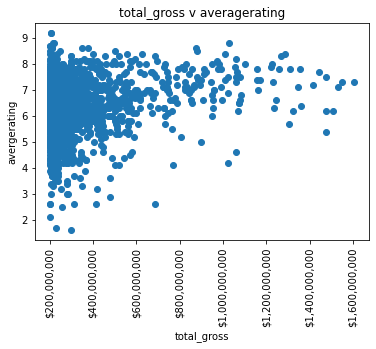

In [33]:
#scatter - correlation 
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('total_gross v averagerating')
ax.set_xlabel('total_gross')
ax.set_ylabel('avergerating')

x = master_table['total_gross']
y = master_table['averagerating']

# ax.set_xticklabels(['$ 0','$200,000,000','$400,000,000', '$600,000,000','$800,000,000','$1,000,000,000','$1,200,000,000',
#                     '$1,400,000,000', '$1,600,000,000'], rotation = 'vertical')

ax.scatter(x, y)

In [52]:
master_table.corr()

,domestic_gross,foreign_gross,year,total_gross,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.788834,0.106598,0.911951,0.098780,0.157622,0.169860,0.626702
foreign_gross,0.788834,1.000000,0.127674,0.971550,0.117264,0.192089,0.150446,0.551887
year,0.106598,0.127674,1.000000,0.126309,0.806989,0.066788,0.020851,-0.066294
total_gross,0.911951,0.971550,0.126309,1.000000,0.116347,0.188895,0.165889,0.609923
start_year,0.098780,0.117264,0.806989,0.116347,1.000000,0.078435,-0.017873,-0.050100
runtime_minutes,0.157622,0.192089,0.066788,0.188895,0.078435,1.000000,0.247437,0.333040
averagerating,0.169860,0.150446,0.020851,0.165889,-0.017873,0.247437,1.000000,0.368070
numvotes,0.626702,0.551887,-0.066294,0.609923,-0.050100,0.333040,0.368070,1.000000


The correlation between total_gross and averagerating is 0.165889 which rounds to 0. There seems to be no correlation between total_gross and averagerating. Lack or correlation does not prove lack of causation. But it can be assumed that just because many consumers watch the movie does NOT mean they like the movie. It is possible fantastic advertising or a well known cast can lead to the spike in consumer spending.

In [53]:
master_table.groupby(['title'])['title','domestic_gross','averagerating'].head(20)

,title,domestic_gross,averagerating
0,Toy Story 3,415000000.0,8.3
1,Inception,292600000.0,8.8
2,Shrek Forever After,238700000.0,6.3
3,The Twilight Saga: Eclipse,300500000.0,5.0
4,Iron Man 2,312400000.0,7.0
...,...,...,...
1798,Bilal: A New Breed of Hero,491000.0,8.0
1799,I Still See You,1400.0,5.7
1800,The Catcher Was a Spy,725000.0,6.2
1801,Time Freak,10000.0,5.7


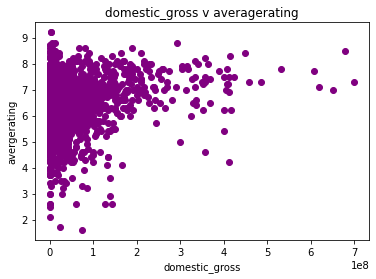

In [35]:
#scatter - correlation 
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('domestic_gross v averagerating')
ax.set_xlabel('domestic_gross')
ax.set_ylabel('avergerating')

x = master_table['domestic_gross']
y = master_table['averagerating']

# ax.set_xticklabels(['$ 0', '$100,000,000', '$200,000,000', '$300,000,000', '$400,000,000', '$500,000,000', '$600,000,000',
#                     '$700,000,000', '$800,000,000'], rotation = 'vertical')

ax.scatter(x, y, color = 'purple')

In [34]:
master_table['domestic_gross'].max()

700100000.0

In [55]:
master_table.groupby(['title'])['title','foreign_gross','averagerating'].head(20)

,title,foreign_gross,averagerating
0,Toy Story 3,652000000.0,8.3
1,Inception,535700000.0,8.8
2,Shrek Forever After,513900000.0,6.3
3,The Twilight Saga: Eclipse,398000000.0,5.0
4,Iron Man 2,311500000.0,7.0
...,...,...,...
1798,Bilal: A New Breed of Hero,1700000.0,8.0
1799,I Still See You,1500000.0,5.7
1800,The Catcher Was a Spy,229000.0,6.2
1801,Time Freak,256000.0,5.7


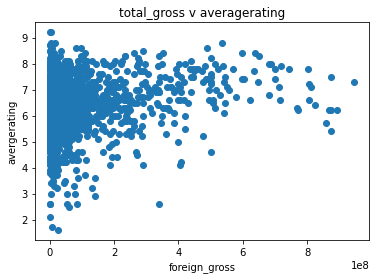

In [56]:
#scatter - correlation 
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('total_gross v averagerating')
ax.set_xlabel('foreign_gross')
ax.set_ylabel('avergerating')

x = master_table['foreign_gross']
y = master_table['averagerating']

ax.scatter(x, y)

In [38]:
master_table['foreign_gross'].max()

946400000.0

In [39]:
9.464 * 100000000

946400000.0